## 3β- Πρόβλεψη της τιμής του Δείκτη Μάζας Σώματος (Body Mass Index - BMI)

## Βιβλιοθήκες

In [31]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [32]:
X_train = pd.read_csv("../CSV_Files/X_train.csv")
X_val = pd.read_csv("../CSV_Files/X_val.csv")
X_test = pd.read_csv("../CSV_Files/X_test.csv")

In [33]:
X_train=X_train.drop(columns=['Weight','Height'])
X_val=X_val.drop(columns=['Weight','Height'])
X_test=X_test.drop(columns=['Weight','Height'])

In [34]:
X_train_before_stand = pd.read_csv("../CSV_Files/X_train_before_stand.csv")
X_val_before_stand = pd.read_csv("../CSV_Files/X_val_before_stand.csv")
X_test_before_stand = pd.read_csv("../CSV_Files/X_test_before_stand.csv")

In [35]:
X_train['BMI']=(X_train_before_stand['Weight']/(X_train_before_stand['Height']**2))
X_val['BMI']=(X_val_before_stand['Weight']/(X_val_before_stand['Height']**2))
X_test['BMI']=(X_test_before_stand['Weight']/(X_test_before_stand['Height']**2))

In [36]:
train_target=X_train['BMI']
val_target=X_val['BMI']
test_target=X_test['BMI']


X_train=X_train.drop(columns=['BMI'])
X_val=X_val.drop(columns=['BMI'])
X_test=X_test.drop(columns=['BMI'])

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_ff = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dense(1)
])


model_ff.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

history_ff = model_ff.fit(
    X_train, train_target,   
    validation_data=(X_val, val_target),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 946.2682 - mae: 29.8221 - mape: 99.3839 - val_loss: 902.7604 - val_mae: 28.8710 - val_mape: 96.8563
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 862.3739 - mae: 28.6354 - mape: 94.9680 - val_loss: 829.2463 - val_mae: 27.6649 - val_mape: 92.8196
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 749.5033 - mae: 26.7082 - mape: 89.9555 - val_loss: 748.0576 - val_mae: 26.2785 - val_mape: 88.2471
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 672.8883 - mae: 25.3023 - mape: 84.5225 - val_loss: 657.5717 - val_mae: 24.6464 - val_mape: 82.9278
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 570.8802 - mae: 23.2556 - mape: 78.6386 - val_loss: 568.5723 - val_mae: 22.9330 - val_mape: 77.3860
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 501.2263 - mae: 21.7536 - mape: 72.2249 - val_loss: 481.2582 - val_mae: 21.1013 - val_mape: 71.4384
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

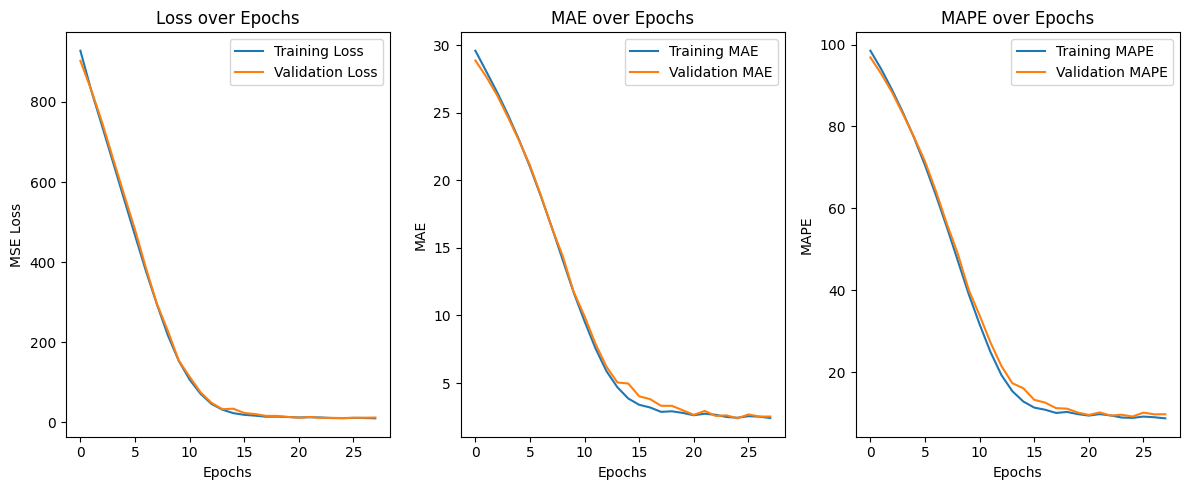

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R² Score: 0.8364
RMSE: 3.4264


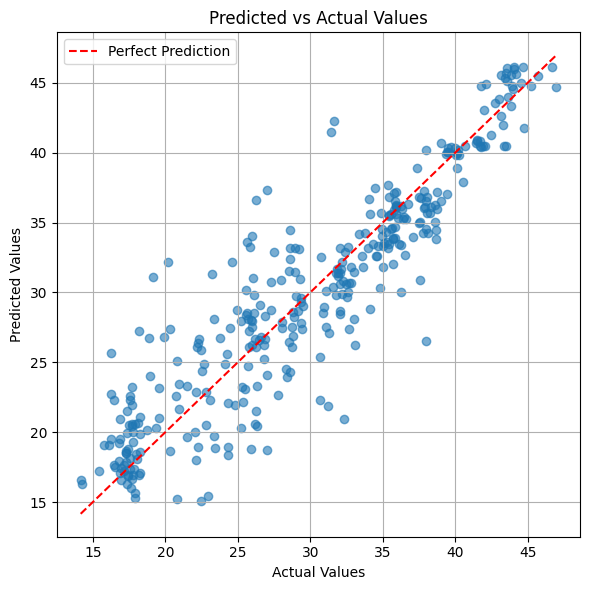

MAPE: 0.0966
Accuracy: 90.34%


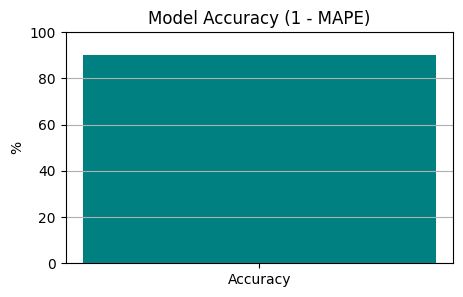

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error


history = history_ff.history


plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss over Epochs')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history['mae'], label='Training MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE over Epochs')
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(history['mape'], label='Training MAPE')
plt.plot(history['val_mape'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('MAPE over Epochs')
plt.legend()

plt.tight_layout()
plt.show()



y_pred = model_ff.predict(X_test)


r2 = r2_score(test_target, y_pred)
rmse = np.sqrt(mean_squared_error(test_target, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


plt.figure(figsize=(6, 6))
plt.scatter(test_target, y_pred, alpha=0.6)
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_target, y_pred)
accuracy = (1 - mape) * 100

print(f"MAPE: {mape:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(5, 3))
plt.bar(['Accuracy'], [accuracy], color='teal')
plt.ylim(0, 100)
plt.title('Model Accuracy (1 - MAPE)')
plt.ylabel('%')
plt.grid(True, axis='y')
plt.show()






## Transfer learning method

### Αρχικά θα μετατρέψουμε τα δεδομένα σε PyTorch tensors

In [39]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = torch.tensor(train_target.values, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(val_target.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(test_target.values, dtype=torch.float32).view(-1, 1)

### Φτιάχνουμε την δομή του Autoencoder

In [40]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, latent_dim))
        
       
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, input_dim))
    
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed

### Εκπαιδεύουμε τον Autoencoder

In [41]:
input_dim = X_train.shape[1]
latent_dim = 32  

autoencoder = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor), batch_size=64)


best_val_loss = float('inf')
patience = 10
epochs_no_improve = 0
train_losses = []
val_losses = []

for epoch in range(100):
    autoencoder.train()
    train_loss = 0
    for batch in train_loader:
        x = batch[0]
        optimizer.zero_grad()
        output = autoencoder(x)
        loss = criterion(output, x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    

    autoencoder.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            x = batch[0]
            output = autoencoder(x)
            val_loss += criterion(output, x).item()
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

autoencoder.load_state_dict(torch.load('best_autoencoder.pth'))

Epoch 1, Train Loss: 0.3519, Val Loss: 0.2017
Epoch 2, Train Loss: 0.1686, Val Loss: 0.0970
Epoch 3, Train Loss: 0.1350, Val Loss: 0.0732
Epoch 4, Train Loss: 0.1150, Val Loss: 0.0628
Epoch 5, Train Loss: 0.1032, Val Loss: 0.0563
Epoch 6, Train Loss: 0.0915, Val Loss: 0.0529
Epoch 7, Train Loss: 0.0853, Val Loss: 0.0485
Epoch 8, Train Loss: 0.0811, Val Loss: 0.0495
Epoch 9, Train Loss: 0.0727, Val Loss: 0.0463
Epoch 10, Train Loss: 0.0682, Val Loss: 0.0442
Epoch 11, Train Loss: 0.0654, Val Loss: 0.0432
Epoch 12, Train Loss: 0.0618, Val Loss: 0.0420
Epoch 13, Train Loss: 0.0618, Val Loss: 0.0394
Epoch 14, Train Loss: 0.0613, Val Loss: 0.0368
Epoch 15, Train Loss: 0.0586, Val Loss: 0.0397
Epoch 16, Train Loss: 0.0549, Val Loss: 0.0344
Epoch 17, Train Loss: 0.0538, Val Loss: 0.0368
Epoch 18, Train Loss: 0.0534, Val Loss: 0.0352
Epoch 19, Train Loss: 0.0515, Val Loss: 0.0360
Epoch 20, Train Loss: 0.0503, Val Loss: 0.0318
Epoch 21, Train Loss: 0.0518, Val Loss: 0.0344
Epoch 22, Train Loss: 

<All keys matched successfully>

In [42]:

encoder = autoencoder.encoder

with torch.no_grad():
    latent_train = encoder(X_train_tensor)
    latent_val = encoder(X_val_tensor)
    latent_test = encoder(X_test_tensor)

In [43]:
class Regressor(nn.Module):
    def __init__(self, input_dim):
        super(Regressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1))
    
    def forward(self, x):
        return self.net(x)

regressor = Regressor(latent_dim)
criterion_reg = nn.MSELoss()
optimizer_reg = optim.Adam(regressor.parameters(), lr=0.001)

# DataLoaders για regression
train_loader_reg = DataLoader(
    TensorDataset(latent_train, y_train_tensor), 
    batch_size=64, shuffle=True)
val_loader_reg = DataLoader(
    TensorDataset(latent_val, y_val_tensor), 
    batch_size=64)

In [44]:
best_val_loss = float('inf')
train_losses_reg = []
val_losses_reg = []

for epoch in range(100):
    regressor.train()
    train_loss = 0
    for batch in train_loader_reg:
        x, y = batch
        optimizer_reg.zero_grad()
        output = regressor(x)
        loss = criterion_reg(output, y)
        loss.backward()
        optimizer_reg.step()
        train_loss += loss.item()
    
    # Validation
    regressor.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader_reg:
            x, y = batch
            output = regressor(x)
            val_loss += criterion_reg(output, y).item()
    
    train_loss /= len(train_loader_reg)
    val_loss /= len(val_loader_reg)
    train_losses_reg.append(train_loss)
    val_losses_reg.append(val_loss)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(regressor.state_dict(), 'best_regressor.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Φόρτωση του καλύτερου μοντέλου
regressor.load_state_dict(torch.load('best_regressor.pth'))

Epoch 1, Train Loss: 997.6006, Val Loss: 958.4397
Epoch 2, Train Loss: 978.9155, Val Loss: 935.2609
Epoch 3, Train Loss: 950.5457, Val Loss: 911.7912
Epoch 4, Train Loss: 915.1579, Val Loss: 881.3346
Epoch 5, Train Loss: 900.4734, Val Loss: 857.9721
Epoch 6, Train Loss: 877.2368, Val Loss: 836.0218
Epoch 7, Train Loss: 844.8285, Val Loss: 804.8491
Epoch 8, Train Loss: 810.8995, Val Loss: 772.5601
Epoch 9, Train Loss: 767.0802, Val Loss: 731.1867
Epoch 10, Train Loss: 760.5779, Val Loss: 715.6317
Epoch 11, Train Loss: 725.3381, Val Loss: 677.0219
Epoch 12, Train Loss: 666.0054, Val Loss: 636.1545
Epoch 13, Train Loss: 634.6753, Val Loss: 593.6079
Epoch 14, Train Loss: 606.6661, Val Loss: 559.8610
Epoch 15, Train Loss: 556.3470, Val Loss: 496.9129
Epoch 16, Train Loss: 512.5443, Val Loss: 465.0030
Epoch 17, Train Loss: 474.5299, Val Loss: 438.8749
Epoch 18, Train Loss: 436.7786, Val Loss: 407.4613
Epoch 19, Train Loss: 405.5715, Val Loss: 368.6269
Epoch 20, Train Loss: 371.3090, Val Loss

<All keys matched successfully>


Transfer Learning Performance:
      Dataset        R2       MAE      RMSE      MAPE
0       Train  0.794031  2.838490  3.755088  0.106240
1  Validation  0.797864  3.065302  3.875293  0.117578
2        Test  0.769329  3.121791  4.068296  0.120970


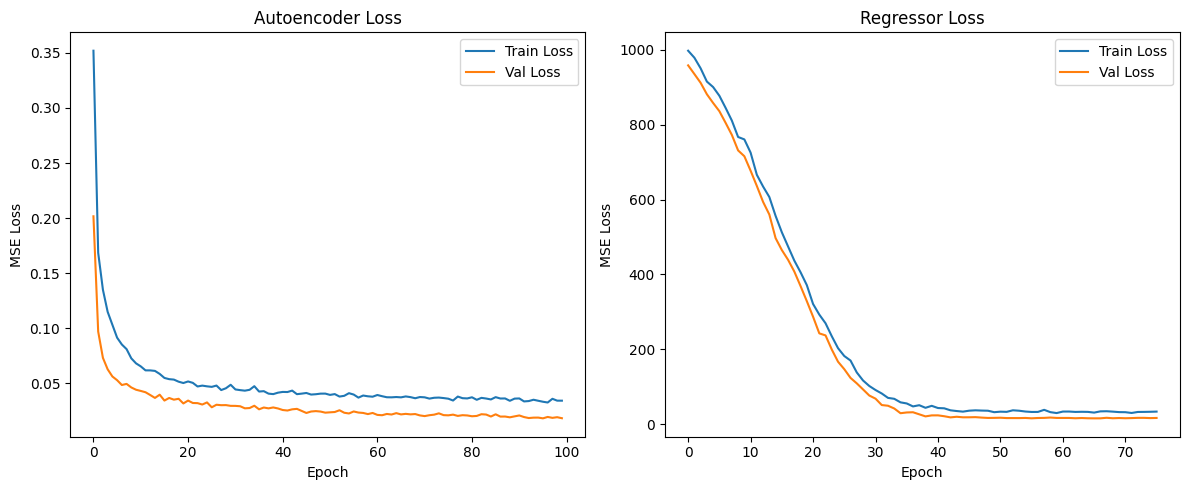

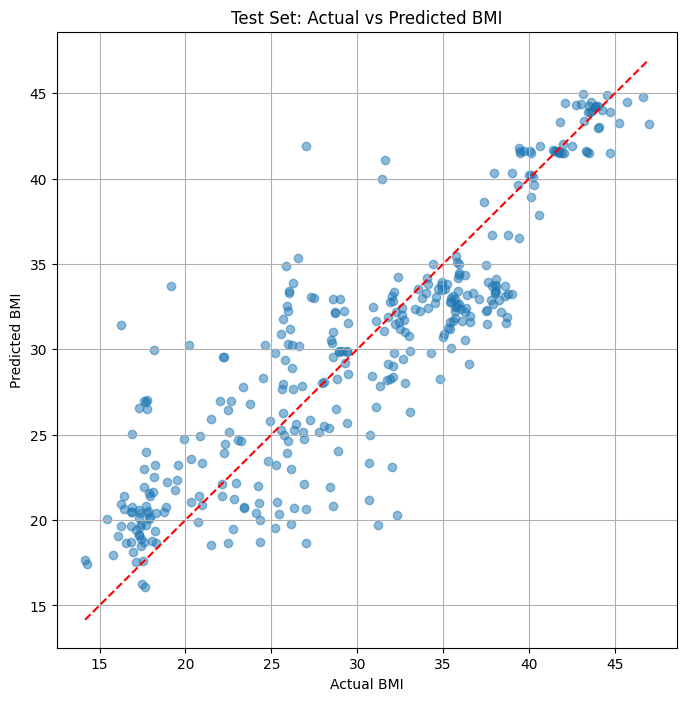

In [ ]:
regressor.eval()
with torch.no_grad():
    
    y_train_pred = regressor(latent_train).numpy()
    y_val_pred = regressor(latent_val).numpy()
    y_test_pred = regressor(latent_test).numpy()


y_train_true = y_train_tensor.numpy()
y_val_true = y_val_tensor.numpy()
y_test_true = y_test_tensor.numpy()


def calculate_metrics(y_true, y_pred, set_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {
        'Dataset': set_name,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

metrics = [
    calculate_metrics(y_train_true, y_train_pred, 'Train'),
    calculate_metrics(y_val_true, y_val_pred, 'Validation'),
    calculate_metrics(y_test_true, y_test_pred, 'Test')
]

metrics_df = pd.DataFrame(metrics)
print("\nTransfer Learning Performance:")
print(metrics_df)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses_reg, label='Train Loss')
plt.plot(val_losses_reg, label='Val Loss')
plt.title('Regressor Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

#Predictions vs Actual
plt.figure(figsize=(8, 8))
plt.scatter(y_test_true, y_test_pred, alpha=0.5)
plt.plot([y_test_true.min(), y_test_true.max()], 
         [y_test_true.min(), y_test_true.max()], 'r--')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Test Set: Actual vs Predicted BMI')
plt.grid(True)
plt.show()